<img src="../images/portada_3.png"/>
<b>BIA_NNI<b>

# Covid-19 vs detecção normal de raio X
---

## ESSA INTELIGENCIA AINDA ESTÁ EM PROCESSO DE APRENDIZADO

## Iintrodução

**Inspiração**

Devido ao cenário atual, o enfrentamento contra a covid-19 se tornou algo crucial e de responsabilidade de todos, e com pouco tempo para pensar demais. Quando começaram os picos de contaminação pelo mundo ninguém sabia como e o que fazer para conter o virus que se espalhava em uma velocidade assustadora, a partir de então começou uma corrida global e incansável para tentar desenvolver soluções ao combate do virus, muitos profissionais da saúde arriscaram ou perderam suas vidas com pacientes contaminados para tentar salvá-los. Foi então que a partir de Janeiro de 2020, o primeiro teste que identificava o Sars-CoV-2(Novo Corona Virus) surgiu, foi no hospital universitário de Charité, em Berlim quem desenvolveu o primeiro RT-PCR, teste que identifica e comprova a contaminação pelo Sars-CoV-2. Após o surgimento do primeiro teste, grandes empresas visaram lucrar com a venda e produção de testes, disponibilizando para vários paises, com a alta na procura por soluções imeditas para detectar se tem ou não o virus. Muitas pessoas se submetram a situações fraudulentas e superfaturamento em testes importados, um absurdo quando se trata em lutar pela vida. Isso tudo só mostrou o quanto o ser humano é hipocrita. Mas por outro lado pesquisadores da área de tecnologia como eu, estamos tentando achar uma forma rápida segura e eficaz para detectar a contaminação claro além da cura também, com o uso da inteligencia artificial, ensinamos máquinas através de algoritimos de marchine learning para aprender e reconhecer padrões de amostras de raio-X do torax de pacientes contaminados e não contaminados, isso se tornou a minha inpiração para este projeto, além de ser uma possível solução para diagnosticar pacientes de forma rápida e precisa por vários lugares.

**Raios x por que??**

"É de conhecimento global que a COVID-19 já afetou diversos lugares [[5]](https://www.bbc.com/portuguese/internacional-51252755)incluindo a região amazônica do Brasil, atual lugar onde eu resido. Devido a exclusividade de testes para covid muitas pessoas ainda ficam sem serem diagnosticadas e isso acaba agravando ainda mais seu quadro de saúde. Máquinas de raio-x estão em quase todos os hospitais do país, além de rápido, estes exames de imagens contribui muito para soluções de machine learnig(Aprendizado de Máquina)[[6]](https://tecnoblog.net/247820/machine-learning-ia-o-que-e/), pois isso permite criar possibilidades de diagnosticos com mais margens de precisão e eficiencia. Usar máquinas para reconhecer posíveis padrões de contaminação pelo virus da covid resultaria em uma prática ainda mais barata e eficaz além de ajudar e facilitar no acesso ao diagnostico da covid-19[[4]](https://pt.wikipedia.org/wiki/Diagn%C3%B3stico_de_COVID-19).

**Agradecimentos**

Este trabalho foi desenvolvido usando TensorFlow e Keras, com base no ótimo tutorial publicado por [Dr. Adrian Rosebrock] (https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/).


## Referências:

- [[1] 2020 Chowdhury et al - Can AI help in screening Viral and COVID-19 pneumonia?](https://arxiv.org/pdf/2003.13145.pdf)
- [[2] 2020 Hall et all - Finding COVID-19 from Chest X-rays using Deep Learning on a Small Dataset](https://arxiv.org/pdf/2004.02060.pdf)
- [[3] 2020 COVID-19 Screening on Chest X-ray Images Using Deep Learning based Anomaly Detection](https://arxiv.org/pdf/2003.12338.pdf)
- [[4] Diagnóstico de COVID-19](https://pt.wikipedia.org/wiki/Diagn%C3%B3stico_de_COVID-19)

- [[5] 2020 Coronavírus: o avanço da doença que já afeta 4 continentes](https://www.bbc.com/portuguese/internacional-51252755)
- [[6] 2020 O que é machine learning e como utilizar?](https://www.ibm.com/br-pt/analytics/machine-learning?p1=Search&p4=43700052630834825&p5=b&cm_mmc=Search_Google-_-1S_1S-_-LA_BR-_-%2Bmachine%20%2Blearning_b&cm_mmca7=71700000065026427&cm_mmca8=kwd-26527633773&cm_mmca9=CjwKCAiAkan9BRAqEiwAP9X6UdwBfIbriIRTmKxwwckb89tkzuAAqq5iZncN4MiW7KkZmcB7HEZ_CBoCmkYQAvD_BwE&cm_mmca10=454541052179&cm_mmca11=b&gclid=CjwKCAiAkan9BRAqEiwAP9X6UdwBfIbriIRTmKxwwckb89tkzuAAqq5iZncN4MiW7KkZmcB7HEZ_CBoCmkYQAvD_BwE&gclsrc=aw.ds)

## Importar bibliotecas e configuração e verificações





In [ ]:
!pwd

/content


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

In [ ]:
!ls /mydrive/covid/

 1.zip
 2covid_pneumo_model.h5
 covid19-chest-x-ray-detection-master.zip
'Covid-19 prediction using X-Ray images -20201105T233400Z-001.zip (Unzipped Files)'
 covid_normal_model.h5
 cv
 images.zip
'TESTE_COVID_RAYX_ARQT_VNN16 (2).ipynb'


In [ ]:
!cp /mydrive/covid/1.zip ../content/

In [ ]:
!unzip ../content/1.zip

In [ ]:
!rm -rf /dataset_validation/covid_validation/*
!rm -rf /dataset_validation/non_covid_pneumonia_validation/*
!rm -rf /dataset_validation/normal_validation/*
!rm -rf images
!print('FEITO!!')

/bin/bash: -c: line 0: syntax error near unexpected token `'FEITO!!''
/bin/bash: -c: line 0: `print('FEITO!!')'


In [ ]:
!cp /mydrive/covid/images.zip ../content/

In [ ]:
!unzip ../content/images.zip

In [ ]:
import os
import datetime
import random
import statistics as stat
from pathlib import Path
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [ ]:
import cv2
from imutils import paths

In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Importe os pacotes necessário
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
# Carregue a extensão do notebook TensorBoard.
%load_ext tensorboard

In [ ]:
# Use isso para limpar os registros de execuções anteriores.
!rm -rf ./logs/ 

## Support Functions

In [ ]:
def load_image_folder(df_metadata, col_img_name, input_dataset_path,
                      output_dataset_path):
    img_number = 0
    # Aqui vamos pegar a lista de dados da COVID-19
    for (i, row) in df_metadata.iterrows():

        # Vamos criar o caminho para o local de entrada das imagens
        imagePath = os.path.sep.join([input_dataset_path, row[col_img_name]])

        # Se o arquivo de imagem não existir (ignore os erros
        # no arquivo de conjunto de dados), ignore a linha.
        if not os.path.exists(imagePath):
            print('imagem não encontrada')
            continue

        # Agora vamos pegar o nome do arquivo do caminho da imagem
        # Em seguida copiamos o caminho para imagem.
        filename = row[col_img_name].split(os.path.sep)[-1]
        outputPath = os.path.sep.join([f"{output_dataset_path}", filename])

        # Vamos copiar a imagem
        shutil.copy2(imagePath, outputPath)
        img_number += 1
    print('{} Imagens selecionadas na pasta {}:'.format(img_number,
                                                    output_dataset_path))

In [ ]:
def load_image_folder_direct(input_dataset_path, output_dataset_path,
                             img_num_select):
    img_number = 0
    pathlist = Path(input_dataset_path).glob('**/*.*')
    nof_samples = img_num_select
    rc = []
    for k, path in enumerate(pathlist):
        if k < nof_samples:
            rc.append(str(path))  # aqui o caminho se tornará um objeto é não string.
            shutil.copy2(path, output_dataset_path)
            img_number += 1
        else:
            i = random.randint(0, k)
            if i < nof_samples:
                rc[i] = str(path)

    print('{} Imagens selecionadas na pasta {}:'.format(img_number,
                                                    output_dataset_path))

In [ ]:
def ceildiv(a, b):
    return -(-a // b)

In [ ]:
def plots_from_files(imspaths,
                     figsize=(10, 5),
                     rows=1,
                     titles=None,
                     maintitle=None):
    """Coloque as imagens em um grid"""
    f = plt.figure(figsize=figsize)
    if maintitle is not None:
        plt.suptitle(maintitle, fontsize=10)
    for i in range(len(imspaths)):
        sp = f.add_subplot(rows, ceildiv(len(imspaths), rows), i + 1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        img = plt.imread(imspaths[i])
        plt.imshow(img)

In [ ]:
def test_rx_image_for_Covid19(imagePath):
    img = cv2.imread(imagePath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis=0)

    img = np.array(img) / 255.0

    pred = new_model.predict(img)
    pred_neg = round(pred[0][1] * 100)
    pred_pos = round(pred[0][0] * 100)

    # para cada imagem no conjunto de teste, precisamos encontrar o índice do
    # rótulo(etiqueta da imagem) com a maior probabilidade prevista correspondente
    # imprimir (np.argmax (pred, axis=1))

    print('\n Raio-X detectar covid-19 usando IA- BIA_PA')
    print('    [AVISO] - Ainda é necessária a supervisão de um especialista')
    if np.argmax(pred, axis=1)[0] == 1:
        plt.title(
            '\nPredição: [NEGATIVO] Probabilide de: {}% \nDe não ser Covid-19\n'.format(
                pred_neg),
            fontsize=12)
    else:
        plt.title(
            '\nPredição: [POSITIVO] Probabilidade de: {}% \nPneumonia por Covid-19 detectada\n'
            .format(pred_pos),
            fontsize=12)

    img_out = plt.imread(imagePath)
    plt.imshow(img_out)
    plt.savefig('../Image_Prediction/Image_Prediction.png')
    return pred_pos

In [ ]:
def test_rx_image_for_Covid19_2(imagePath, neg_cnt, pos_cnt):
    img = cv2.imread(imagePath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224, 224))
    img = np.expand_dims(img, axis = 0)

    img = np.array(img) / 255.0

    pred = new_model.predict(img)

    # para cada imagem no conjunto de teste, precisamos encontrar o índice do
    # rótulo(etiqueta da imagem) com a maior probabilidade prevista correspondente
    # imprimir (np.argmax (pred, axis=1))
    
    if np.argmax(pred, axis=1)[0] == 1:
        neg_cnt +=1
    else:
        pos_cnt +=1
        
    return pred[0][0], neg_cnt, pos_cnt

In [ ]:
def test_rx_image_for_Covid19_batch(img_lst):
    neg_cnt = 0
    pos_cnt = 0
    predictions_score = []
    for img in img_lst:
        pred, neg_cnt, pos_cnt = test_rx_image_for_Covid19_2(img, neg_cnt, pos_cnt)
        predictions_score.append(pred)
    print ('{} positivo detectado em um total de {} imagens'.format(pos_cnt, (pos_cnt+neg_cnt)))
    return  predictions_score, neg_cnt, pos_cnt

In [ ]:
def plot_prediction_distribution(dist, name='Distribuição de pontuação de previsão do conjunto de dados'):
    f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
    sns.despine(left=True)
    sns.distplot(dist, hist=True, color = 'royalblue', ax=axes[0])
    sns.boxplot(dist, color = 'firebrick', ax=axes[1])
    plt.suptitle(name, size = 20)
    plt.setp(axes, yticks=[]);

In [ ]:
def plot_accuraccy(history):
    plt.style.use('seaborn-paper')
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Precisão de treinamento')
    plt.plot(val_acc, label='Precisão de validação')
    plt.legend(loc='lower right')
    plt.ylabel('Precisão')
    plt.title('Precisão de treinamento e validação')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Perda de treinamento')
    plt.plot(val_loss, label='Perda de Validação')
    plt.legend(loc='upper right')
    plt.ylabel('Entropia Cruzada')
    plt.title('Perda de treinamento e validação')
    plt.xlabel('época')
    plt.show()

## Dados não tratados

# **Conjunto de dados 1: coleta de dados de imagem COVID-19** <br>
Joseph Paul Cohen e Paul Morrison e Lan Dao
COVID-19 coleta de dados de imagem, arXiv: 2003.11597, 2020

Resumo do projeto: Para construir um conjunto de dados público aberto de imagens de raios-X e TC de tórax de pacientes que são positivos ou suspeitos de COVID-19 ou outras pneumonias virais e bacterianas (MERS, SARS e ARDS.). Os dados serão coletados de fontes públicas, bem como por meio de coleta indireta de hospitais e médicos. Este projeto foi aprovado pelo Comitê de Ética da Universidade de Montreal # CERSES-20-058-D

Todas as imagens e dados serão divulgados publicamente neste [GitHub repo](https://github.com/ieee8023/covid-chestxray-dataset).

**Conjunto de dados 2: Imagens de raio-X de tórax (pneumonia)**<br>
Kermany, Daniel; Zhang, Kang; Goldbaum, Michael (2018), “Tomografia de coerência óptica rotulada (OCT) e imagens de raio-X de tórax para classificação”, Mendeley Data, v2 http://dx.doi.org/10.17632/rscbjbr9sj.2 

Conjunto de dados de OCT validado e imagens de raio-X de tórax descritas e analisadas em "Classificação baseada em aprendizagem profunda e referência de doenças humanas tratáveis". As imagens são divididas em um conjunto de treinamento e um conjunto de teste de pacientes independentes. As imagens são divididas em 2 diretórios: PNEUMONIA e NORMAL.

Arquivos: https://data.mendeley.com/datasets/rscbjbr9sj/2

## Visão geral técnica

**Qual a diferença entre um AP e um PA de uma radiografia?**

Qual é a diferença entre uma visão AP e uma visão PA de um raio-X? em palavras simples, durante o procedimento de fazer uma radiografia quando o raio-x passa da parte posterior do corpo para a parte anterior, é chamado de vista PA. Enquanto na visualização AP, a direção é oposta.

Agora vamos entender a importância de fazer isso. De acordo com os conceitos da física, quanto menor a distância entre o objeto e a tela, mais clara é a formação da sombra. Neste caso, o raio X é a fonte de luz e nós somos o objeto. Assim, na vista AP o aspecto posterior dá melhor sombra, enquanto na vista PA o aspecto anterior dá melhor sombra.

Na maioria das vezes, o raio-x é obtido na visualização AP para qualquer parte do corpo. Uma exceção importante aqui é o banco de imagens. No repositório disponibilizado pelo Dr.Joseph, preferimos a visualização PA em vez da visualização AP. Mas se o paciente estiver muito doente e não conseguir manter sua posição, a visualização AP pode ser feita para o tórax.

<img src="../images/ap_pa_chest.jpg"/>

Do ponto de vista do exame, qualquer raio-x que você vê em geral é AP, ou L (Lateral) e qualquer raio-x de tórax é principalmente vista PA.



## Criação do conjunto de dados Covid-19

In [ ]:
!mv ../content/model ../

mv: cannot stat '../content/model': No such file or directory


In [ ]:
ls ../input

10_Covid_Imagens/  20_Chest_Xray/


### Analisando o conjunto de dados brutos Covid-19<br>PS:(Esses dados são obtidos da planilha metadata.csv baixadas do Repo do Dr.)

---



In [ ]:
input_dataset_path = '../input/10_Covid_Imagens'

In [ ]:
csvPath = os.path.sep.join([input_dataset_path, "metadata.csv"])
df = pd.read_csv(csvPath)
df.shape

(950, 30)

In [ ]:
df.head(2)

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,N,Y,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [ ]:
df.groupby('view').count()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,in_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
view,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AP,203,136,179,180,203,145,50,71,72,69,49,24,9,25,16,6,2,10,203,127,189,203,203,76,203,136,195,103,2
AP Erect,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1,0
AP Supine,234,206,224,114,234,138,138,48,48,172,153,15,16,14,46,3,12,14,234,211,228,234,234,167,234,177,113,74,1
Axial,68,36,59,64,68,68,14,17,17,9,9,4,0,4,3,1,0,0,68,41,68,68,68,10,68,58,68,31,0
Coronal,16,1,8,13,16,16,6,6,6,0,0,0,0,0,0,0,0,0,16,3,16,16,16,3,16,16,16,0,0
L,84,53,84,81,84,25,28,18,19,16,12,11,1,4,5,0,0,0,84,44,80,84,84,3,84,72,84,61,0
PA,344,265,315,260,344,201,125,88,88,131,112,36,11,31,49,6,14,16,344,235,312,344,344,123,344,245,291,166,2


In [ ]:
df.modality.value_counts()

X-ray    866
CT        84
Name: modality, dtype: int64

In [ ]:
xray = df[df.modality == 'X-ray'].copy()
xray.shape

(866, 30)

In [ ]:
xray.view.value_counts()

PA           344
AP Supine    234
AP           203
L             84
AP Erect       1
Name: view, dtype: int64

In [ ]:
xray.finding.value_counts()

Pneumonia/Viral/COVID-19                   504
todo                                        83
Pneumonia                                   81
Pneumonia/Fungal/Pneumocystis               30
Pneumonia/Bacterial/Streptococcus           22
Tuberculosis                                18
No Finding                                  18
Pneumonia/Viral/SARS                        16
Pneumonia/Lipoid                            13
Pneumonia/Bacterial/Mycoplasma              11
Pneumonia/Viral/MERS-CoV                    10
Pneumonia/Bacterial/Klebsiella              10
Pneumonia/Bacterial/Legionella              10
Pneumonia/Bacterial/Nocardia                 8
Pneumonia/Viral/Varicella                    6
Pneumonia/Viral/Influenza                    5
Pneumonia/Bacterial/E.Coli                   4
Pneumonia/Bacterial                          4
Pneumonia/Bacterial/Chlamydophila            3
Pneumonia/Viral/Herpes                       3
Pneumonia/Fungal/Aspergillosis               2
Pneumonia/Vir

In [ ]:
xray[xray.finding == 'Pneumonia/Viral/COVID-19'].view.value_counts()

PA           196
AP           146
AP Supine    136
L             26
Name: view, dtype: int64

In [ ]:
xray_cv = xray[(xray.finding == 'Pneumonia/Viral/COVID-19') & (xray.view == 'PA')].copy()
xray_cv.reset_index(drop=True, inplace=True)
xray_cv.shape

(196, 30)

In [ ]:
# Total de raios X PA
len(xray_cv.patientid)

196

In [ ]:
# Total de pacientes únicos que fizeram PA sem que tenha repetido.
len(set(xray_cv.patientid))

139

In [ ]:
xray_cv.date.value_counts()

2020                 122
January 22, 2020       3
January 1, 2020        2
January 27, 2020       2
Feb 21, 2020           2
03/16/20               2
January 25, 2020       2
Feb 17, 2020           1
December 30, 2019      1
January 28, 2020       1
March 10, 2020         1
01/13/20               1
Jan 28, 2020           1
Feb 18, 2020           1
January 19, 2020       1
January 30, 2020       1
January 6, 2020        1
Mar 3, 2020            1
Feb 5, 2020            1
February 25, 2020      1
February 18, 2020      1
December 29, 2019      1
January 12, 2020       1
January 26, 2020       1
Feb 16, 2020           1
Jan 24, 2020           1
2/29/2020              1
January 10, 2020       1
March 4, 2020          1
January 24, 2020       1
Name: date, dtype: int64

Aqui você pode citar datas de diferentes imagens para usar no teste posterior a terino do trinamento de nosso modelo. A relação acima irá judar você na procura das imagens existentes. (**Se preferir pegue a lista que eu já deixei separada, pode ajudar na separação.**) separe 8 imagens para o teste.

In [ ]:
xray_cv[xray_cv.date == '03/16/20'].filename

58    2966893D-5DDF-4B68-9E2B-4979D5956C8E.jpeg
59    6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg
Name: filename, dtype: object

In [ ]:
xray_cv[xray_cv.date == 'February 25, 2020'].filename

169    1-s2.0-S2214250920300834-gr1_lrg-c.png
Name: filename, dtype: object

In [ ]:
xray_cv[xray_cv.date == 'March 4, 2020'].filename

35    F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
Name: filename, dtype: object

In [ ]:
xray_cv[xray_cv.date == 'March 10, 2020'].filename

36    E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg
Name: filename, dtype: object

In [ ]:
xray_cv[xray_cv.date == 'February 25, 2020'].filename

169    1-s2.0-S2214250920300834-gr1_lrg-c.png
Name: filename, dtype: object

In [ ]:
xray_cv[xray_cv.date == 'Mar 3, 2020'].filename

23    7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg
Name: filename, dtype: object

In [ ]:
xray_cv[xray_cv.date == 'February 18, 2020'].filename

168    1-s2.0-S2214250920300834-gr1_lrg-b.png
Name: filename, dtype: object

***Nessa parte você pode inserir manualmente o nome das imagens se quiser. Desde que separe do restante do treino.

In [ ]:
imgs_march = [
    
    
    '31BA3780-2323-493F-8AED-62081B9C383B.jpeg',
    '296_2020_4584_Fig2_HTML-a.png',
    '26eecee1e498237cc3ea3274b79ff0_jumbo.jpg',
    '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png',
    '071d06607edf81d70c940e043bce34_jumbo.jpeg',
    '10.1016-slash-j.hrcr.2020.04.015-a.png',
    'F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg',
    '23E99E2E-447C-46E5-8EB2-D35D12473C39.png'
]

In [ ]:
xray_cv_train = xray_cv[~xray_cv.filename.isin(imgs_march)]
xray_cv_train.reset_index(drop=True, inplace=True)
print('No Dataset tem {} imagens de março/20 e no Datataset para treino restaram: {}'.format(
    len(imgs_march), len(xray_cv_train)))

No Dataset tem 8 imagens de março/20 e no Datataset para treino restaram: 193


In [ ]:
xray_cv_val = xray_cv[xray_cv.filename.isin(imgs_march)]
xray_cv_val.reset_index(drop=True, inplace=True)
print('Validação do dataset: {}'.format(len(xray_cv_val)))

Validação do dataset: 3


Abaixo mova as imagens para separar para fazer testes depois.

In [ ]:
!mv /input/10_Covid_Imagens/images/31BA3780-2323-493F-8AED-62081B9C383B.jpeg /dataset_validation/covid_validation
!mv /input/10_Covid_Imagens/images/296_2020_4584_Fig2_HTML-a.png /dataset_validation/covid_validation
!mv /input/10_Covid_Imagens/images/26eecee1e498237cc3ea3274b79ff0_jumbo.jpg /dataset_validation/covid_validation
!mv /input/10_Covid_Imagens/images/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg /dataset_validation/covid_validation
!mv /input/10_Covid_Imagens/images/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png /dataset_validation/covid_validation
!mv /input/10_Covid_Imagens/images/071d06607edf81d70c940e043bce34_jumbo.jpeg /dataset_validation/covid_validation
!mv /input/10_Covid_Imagens/images/10.1016-slash-j.hrcr.2020.04.015-a.png /dataset_validation/covid_validation
!mv /input/10_Covid_Imagens/images/23E99E2E-447C-46E5-8EB2-D35D12473C39.png /dataset_validation/covid_validation


### Criação de uma pasta de validação Covid

In [ ]:
input_dataset_path = '../input/10_Covid_Imagens/images'
output_dataset_path = '../dataset_validation/covid_validation'
dataset = xray_cv_val
col_img_name = 'filename'

load_image_folder(dataset, col_img_name, input_dataset_path, output_dataset_path)

imagem não encontrada
imagem não encontrada
imagem não encontrada
0 Imagens selecionadas na pasta ../dataset_validation/covid_validation:


### Criação de uma pasta de imagens de treinamento Covid-19

In [ ]:
input_dataset_path = '../input/10_Covid_Imagens/images'
output_dataset_path = '../10_dataset/covid'
dataset = xray_cv_train
col_img_name = 'filename'

In [ ]:
load_image_folder(dataset, col_img_name,
                  input_dataset_path, output_dataset_path)

imagem não encontrada
imagem não encontrada
imagem não encontrada
imagem não encontrada
imagem não encontrada
imagem não encontrada
imagem não encontrada
imagem não encontrada
185 Imagens selecionadas na pasta ../10_dataset/covid:


## Criando dataset NORMAL para validação

In [ ]:
!ls ../input/20_Chest_Xray/train

NORMAL	PNEUMONIA


###  Criando uma pasta de treinamento Normal

In [ ]:
input_dataset_path = '../input/20_Chest_Xray/train/NORMAL'
output_dataset_path = '../10_dataset/normal'
img_num_select = len(xray_cv_train)  # Mesmo número de amostras que os dados da Covid

In [ ]:
load_image_folder_direct(input_dataset_path, output_dataset_path,
                         img_num_select)

193 Imagens selecionadas na pasta ../10_dataset/normal:


### Criação de uma pasta de validação Normal

In [ ]:
input_dataset_path = '../input/20_Chest_Xray/train/NORMAL'
output_dataset_path = '../dataset_validation/normal_validation'
img_num_select = 20
load_image_folder_direct(input_dataset_path, output_dataset_path,
                         img_num_select)

20 Imagens selecionadas na pasta ../dataset_validation/normal_validation:


### Criação de uma pasta de validação não Covid (PNEUMONIA)

In [ ]:
input_dataset_path = '../input/20_Chest_Xray/train/PNEUMONIA'
output_dataset_path = '../dataset_validation/non_covid_pneumonia_validation'
img_num_select = 20
load_image_folder_direct(input_dataset_path, output_dataset_path,
                         img_num_select)

20 Imagens selecionadas na pasta ../dataset_validation/non_covid_pneumonia_validation:


## Plotar dataset para verificação rápida

In [ ]:
dataset_path = '../10_dataset'

In [ ]:
normal_images = list(paths.list_images(f"{dataset_path}/normal"))
covid_images = list(paths.list_images(f"{dataset_path}/covid"))

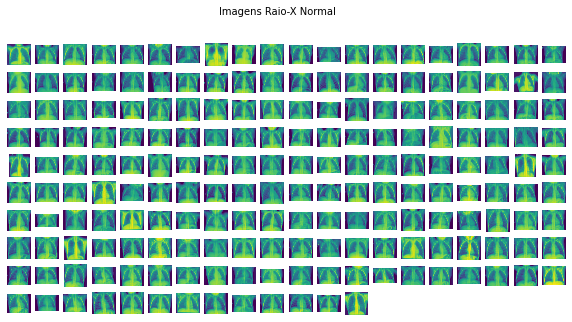

In [ ]:
plots_from_files(normal_images, rows=10, maintitle="Imagens Raio-X Normal")

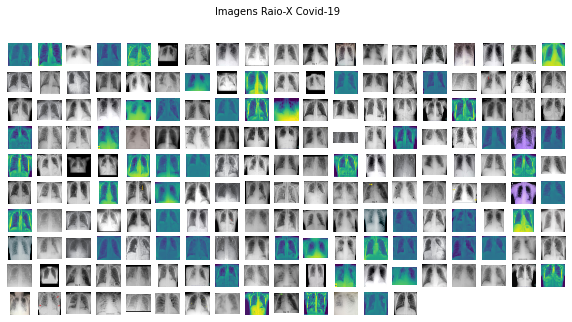

In [ ]:
plots_from_files(covid_images, rows=10, maintitle="Imagens Raio-X Covid-19")

In [ ]:
validation_path = '../dataset_validation'
normal_val_images = list(paths.list_images(
    f"{validation_path}/normal_validation"))
non_covid_pneumonia_validation_images = list(paths.list_images(
    f"{validation_path}/non_covid_pneumonia_validation"))
covid_val_images = list(paths.list_images(
    f"{validation_path}/covid_validation"))

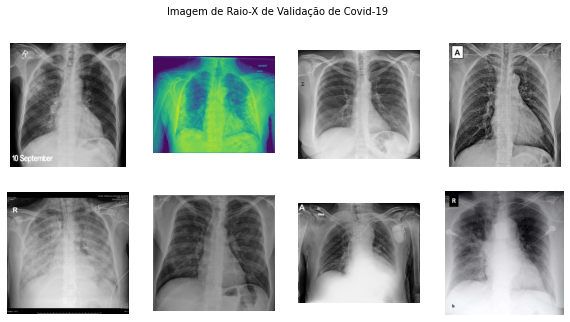

In [ ]:
plots_from_files(covid_val_images, rows=2, maintitle="Imagem de Raio-X de Validação de Covid-19")

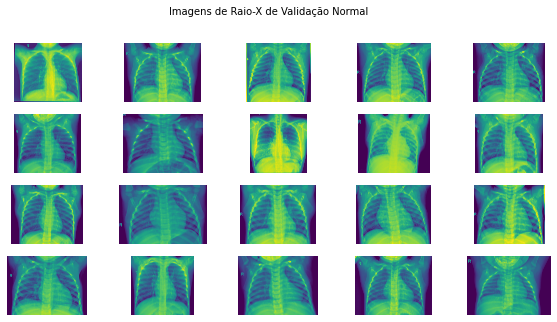

In [ ]:
plots_from_files(normal_val_images, rows=4, maintitle="Imagens de Raio-X de Validação Normal")

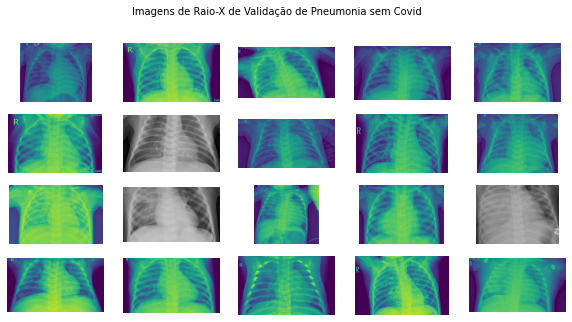

In [ ]:
plots_from_files(non_covid_pneumonia_validation_images, rows=4, maintitle="Imagens de Raio-X de Validação de Pneumonia sem Covid")

## Pré-processamento de dados

### Inicializando hiperparâmetros (Digamos que isso é a onde você deduz o quanto quer aprender)

In [ ]:
# inicializar a taxa de aprendizagem inicial, número de épocas para treinar e o tamanho do lote
INIT_LR = 1e-3         # [0.00001]
EPOCHS = 10            # [200]
BS = 8                 # [16, 32]
NODES_DENSE0 = 64      # [128]
DROPOUT = 0.5          # [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
MAXPOOL_SIZE = (4, 4)  # [(2,2) , (3,3)]
ROTATION_DEG = 15      # [10]
SPLIT = 0.2            # [0.1]

In [ ]:
# pegue a lista de imagens em nosso diretório dataset e inicialize
# a lista de dados (ou seja, images) que possui a classe de imagens
print("[INFO] carregando imagens...", end = '')
imagePaths = list(paths.list_images(dataset_path))
print("[Feito]")

[INFO] carregando imagens...[Feito]


In [ ]:
data = []
labels = []
# loop no diretório de imagens
for imagePath in imagePaths:
    # Extraia o rótulo(label) da classe do nome do arquivo
    label = imagePath.split(os.path.sep)[-2]
    # carregar a imagem, trocar canais de cor e redimensionar para
    # 224x224 pixels enquanto ignora a proporção de aspecto
    image = cv2.imread(imagePath)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    # atualizar as listas de dados e etiqueta(label), respectivamente
    data.append(image)
    labels.append(label)

In [ ]:
# converter os dados e etiquetas(labels) em matrizes NumPy enquanto dimensiona o pixel
# intensidades do alcance(range) [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
# executa codificação one-hot nas etiquetas
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
# particionar os dados em treinamento e teste
(trainX, testX, trainY, testY) = train_test_split(data,
                                                  labels,
                                                  test_size=SPLIT,
                                                  stratify=labels,
                                                  random_state=42)

In [ ]:
# Aumento de dados contra Overfiffing
# inicializar o objeto de aumento de dados de treinamento
trainAug = ImageDataGenerator(rotation_range=ROTATION_DEG, fill_mode="nearest")

## Modelo

In [ ]:
# {'dcnn_resnet', 'resnet50v2', 'resnet101v2'}

In [ ]:
# carregar a rede VGG16, garantindo que os conjuntos de camadas FC principais sejam deixados de fora
baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
# construir a cabeça do modelo que será colocado em cima do modelo base
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=MAXPOOL_SIZE)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(NODES_DENSE0, activation="relu")(headModel)
headModel = Dropout(DROPOUT)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

In [ ]:
#coloque o modelo FC da cabeça em cima do modelo básico (isso se tornará
# o modelo real que iremos treinar)
model = Model(inputs=baseModel.input, outputs=headModel)
# loop sobre todas as camadas do modelo base e congele-as para que
# *não* seja atualizado durante o primeiro processo de treinamento
for layer in baseModel.layers:
    layer.trainable = False

### Training

In [ ]:
# compilar nosso modelo
print("[INFO] compilação do modelo...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] compilação do modelo...


## use isso para trapacear o GoogleCB

In [ ]:
function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

In [ ]:
# treinar a cabeça da rede
print("[INFO] treinamento do nosso cérebro  virtual...")
H = model.fit(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

[INFO] treinamento do nosso cérebro  virtual...
Epoch 1/10
37/37 [==============================] - 187s 5s/step - loss: 0.6737 - accuracy: 0.6327 - val_loss: 0.4536 - val_accuracy: 0.9342
Epoch 2/10
37/37 [==============================] - 184s 5s/step - loss: 0.3867 - accuracy: 0.8571 - val_loss: 0.3441 - val_accuracy: 0.9211
Epoch 3/10
37/37 [==============================] - 186s 5s/step - loss: 0.2996 - accuracy: 0.9082 - val_loss: 0.2766 - val_accuracy: 0.9211
Epoch 4/10
37/37 [==============================] - 184s 5s/step - loss: 0.2068 - accuracy: 0.9422 - val_loss: 0.2291 - val_accuracy: 0.9211
Epoch 5/10
37/37 [==============================] - 186s 5s/step - loss: 0.1686 - accuracy: 0.9524 - val_loss: 0.2082 - val_accuracy: 0.9211
Epoch 6/10
37/37 [==============================] - 188s 5s/step - loss: 0.1466 - accuracy: 0.9592 - val_loss: 0.1867 - val_accuracy: 0.9211
Epoch 7/10
37/37 [==============================] - 188s 5s/step - loss: 0.1250 - accuracy: 0.9694 - val_l

In [ ]:
 %tensorboard --logdir logs/fit

### Traçar métricas de treinamento

In [ ]:
def mostrar_grafico(history):
    plt.style.use('seaborn-paper')
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Precisão de treinamento')
    plt.plot(val_acc, label='Precisão de validação')
    plt.legend(loc='lower right')
    plt.ylabel('Precisão')
    plt.title('Precisão de treinamento e validação')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Perda de treinamento')
    plt.plot(val_loss, label='Perda de Validação')
    plt.legend(loc='upper right')
    plt.ylabel('Entropia Cruzada')
    plt.title('Perda de treinamento e validação')
    plt.xlabel('época')
    plt.show()

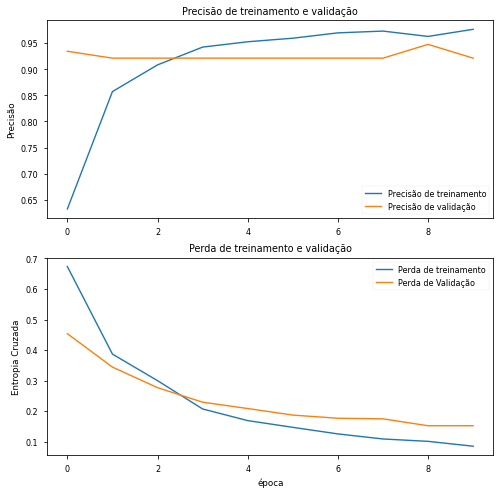

In [ ]:
mostrar_grafico(H)

### Avaliação

In [ ]:
# fazer previsões no conjunto de teste
print("[INFO] avaliando rede...")
predIdxs = model.predict(testX, batch_size=BS)
# para cada imagem no conjunto de teste, precisamos encontrar o índice do
# rótulo com a maior probabilidade prevista correspondente
predIdxs = np.argmax(predIdxs, axis=1)
# mostrar um relatório de classificação bem formatado
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] avaliando rede...
              precision    recall  f1-score   support

       covid       0.90      0.95      0.92        37
      normal       0.95      0.90      0.92        39

    accuracy                           0.92        76
   macro avg       0.92      0.92      0.92        76
weighted avg       0.92      0.92      0.92        76



#### Matriz de confusão

In [ ]:
def obter_precisao(estimator, input_fn):
  return [x["class_ids"][0] for x in estimator.predict(input_fn=input_fn)]

LABELS = [
    "negative", "positive"
]

# Crie uma matriz de confusão nos dados de treinamento.
cm = tf.math.confusion_matrix(train_df["polarity"], 
                              obter_precisao(estimator, predict_train_input_fn))

# Normalize a matriz de confusão de forma que cada linha some 1.
cm = tf.cast(cm, dtype=tf.float32)
cm = cm / tf.math.reduce_sum(cm, axis=1)[:, np.newaxis]

sns.heatmap(cm, annot=True, xticklabels=LABELS, yticklabels=LABELS);
plt.xlabel("Predicted");
plt.ylabel("True");

NameError: ignored

In [ ]:
# calcular a matriz de confusão e usá-la para derivar a
# precisão, sensibilidade e especificidade
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
# mostrar a matriz de confusão, precisão, sensibilidade e especificidade
print(cm)
print("acc: {:.4f}".format(acc))
print("sensibilidade: {:.4f}".format(sensitivity))
print("especificidade: {:.4f}".format(specificity))

[[35  2]
 [ 4 35]]
acc: 0.9211
sensibilidade: 0.9459
especificidade: 0.8974


## Ajustando o Modelo



### alterando hiperparâmetros

In [ ]:
# inicializar a taxa de aprendizagem inicial, número de épocas para treinar e tamanho do lote
INIT_LR = 0.0001         # [0.00001]
EPOCHS = 20            # [200]
BS = 16                 # [16, 32]
NODES_DENSE0 = 128      # [128]
DROPOUT = 0.5          # [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
MAXPOOL_SIZE = (2, 2)  # [(2,2) , (3,3)]
ROTATION_DEG = 15      # [10]
SPLIT = 0.2            # [0.1]

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=MAXPOOL_SIZE)(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(NODES_DENSE0, activation="relu")(headModel)
headModel = Dropout(DROPOUT)(headModel)
headModel = Dense(2, activation="softmax")(headModel)

model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
    layer.trainable = False

### Compilação e Treinamento

In [ ]:
# compilar nosso modelo
print("[INFO] compilando modelo...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])

# treinar a cabeça da rede
print("[INFO] treinamento do nosso cérebro  virtual...")
H = model.fit(
    trainAug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

[INFO] compilando modelo...
[INFO] treinamento do nosso cérebro  virtual...
Epoch 1/20
18/18 [==============================] - 175s 10s/step - loss: 0.6007 - accuracy: 0.6713 - val_loss: 0.3504 - val_accuracy: 0.8947
Epoch 2/20
18/18 [==============================] - 176s 10s/step - loss: 0.3332 - accuracy: 0.8706 - val_loss: 0.2056 - val_accuracy: 0.9737
Epoch 3/20
18/18 [==============================] - 176s 10s/step - loss: 0.1862 - accuracy: 0.9580 - val_loss: 0.1478 - val_accuracy: 0.9868
Epoch 4/20
18/18 [==============================] - 175s 10s/step - loss: 0.1247 - accuracy: 0.9860 - val_loss: 0.1201 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 176s 10s/step - loss: 0.1142 - accuracy: 0.9720 - val_loss: 0.1001 - val_accuracy: 0.9868
Epoch 6/20
18/18 [==============================] - 174s 10s/step - loss: 0.1080 - accuracy: 0.9685 - val_loss: 0.0906 - val_accuracy: 1.0000
Epoch 7/20
18/18 [==============================] - 175s 10s/step - loss

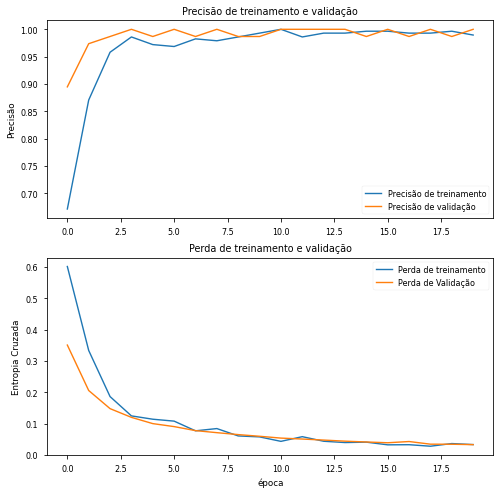

In [ ]:
mostrar_grafico(H)

In [ ]:
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(
    classification_report(testY.argmax(axis=1),
                          predIdxs,
                          target_names=lb.classes_))

              precision    recall  f1-score   support

       covid       1.00      1.00      1.00        37
      normal       1.00      1.00      1.00        39

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [ ]:
cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("\nacc: {:.4f}".format(acc))
print("sensibilidade: {:.4f}".format(sensitivity))
print("especificidade: {:.4f}".format(specificity))

[[37  0]
 [ 0 39]]

acc: 1.0000
sensibilidade: 1.0000
especificidade: 1.0000


Agora salve o Modelo

In [ ]:
#Salve todo o modelo em um arquivo HDF5.
# A extensão '.h5' indica que o modelo deve ser salvo em HDF5.
model.save("../model/2covid_normal_model.h5")

In [ ]:
!cp ../model/2covid_normal_model.h5 /mydrive/covid/

Carregar Modelo recem criado para realizar os testes

In [ ]:
from tensorflow.keras.models import load_model
# Recrie exatamente o mesmo modelo, incluindo seus pesos e o otimizador
new_model = load_model('../model/covid_normal_model.h5')

# Mostre a arquitetura do modelo
new_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# Mostre a arquitetura do modelo
print("[INFO] avaliando rede...")
predIdxs = new_model.predict(testX, batch_size=BS)
# para cada imagem no conjunto de teste, precisamos encontrar o índice do
# rótulo com a maior probabilidade prevista correspondente
predIdxs = np.argmax(predIdxs, axis=1)
# agora vamos ver nosso relatório de classificação.
print(classification_report(testY.argmax(axis=1), predIdxs, target_names=lb.classes_))

[INFO] avaliando rede...
              precision    recall  f1-score   support

       covid       1.00      1.00      1.00        37
      normal       1.00      1.00      1.00        39

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



## Testando modelo com imagens reais

### Teste em imagens Covid (de março / 2020)

In [ ]:
!mkdir Image_Prediction


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


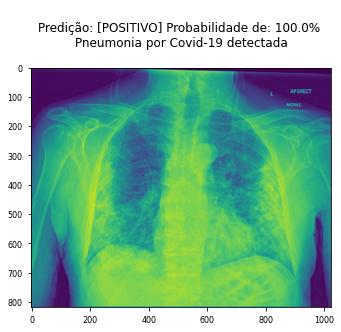

In [ ]:
imagePath = '../dataset_validation/covid_validation/071d06607edf81d70c940e043bce34_jumbo.jpeg'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


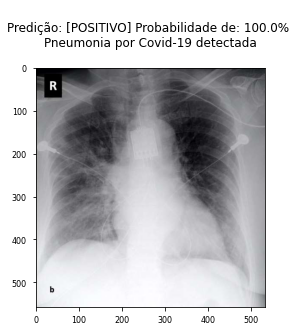

In [ ]:
imagePath = '../dataset_validation/covid_validation/1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


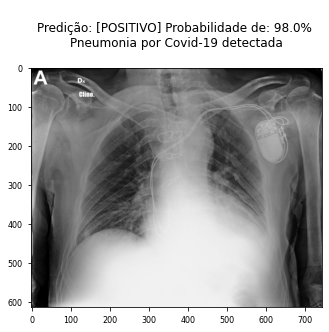

In [ ]:
imagePath = '../dataset_validation/covid_validation/10.1016-slash-j.hrcr.2020.04.015-a.png'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


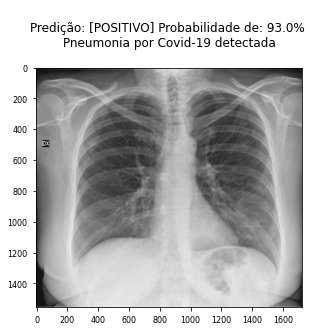

In [ ]:
imagePath = '../dataset_validation/covid_validation/23E99E2E-447C-46E5-8EB2-D35D12473C39.png'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


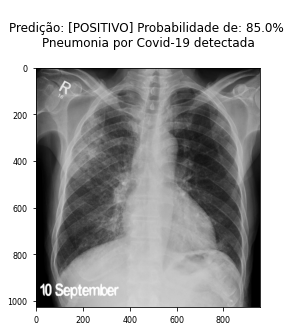

In [ ]:
imagePath = '../dataset_validation/covid_validation/26eecee1e498237cc3ea3274b79ff0_jumbo.jpg'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


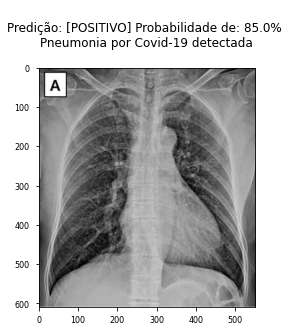

In [ ]:
imagePath = '../dataset_validation/covid_validation/296_2020_4584_Fig2_HTML-a.png'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


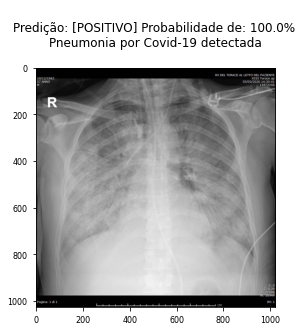

In [ ]:
imagePath = '../dataset_validation/covid_validation/31BA3780-2323-493F-8AED-62081B9C383B.jpeg'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


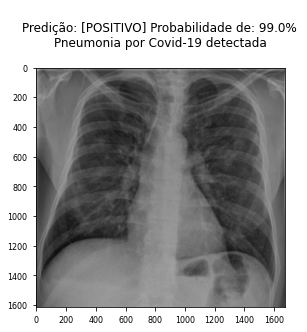

In [ ]:
imagePath = '../dataset_validation/covid_validation/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg'
pred = test_rx_image_for_Covid19(imagePath)

### Testando em imagens Normais:


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


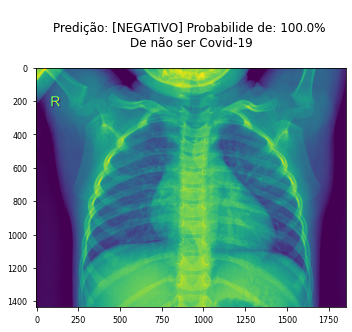

In [ ]:
imagePath = '../dataset_validation/normal_validation/IM-0223-0001.jpeg'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


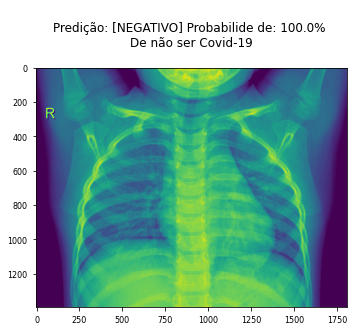

In [ ]:
imagePath = '../dataset_validation/normal_validation/IM-0241-0001.jpeg'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


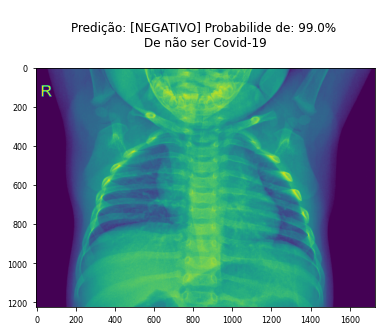

In [ ]:
imagePath = '../dataset_validation/normal_validation/IM-0280-0001.jpeg'
pred = test_rx_image_for_Covid19(imagePath)


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


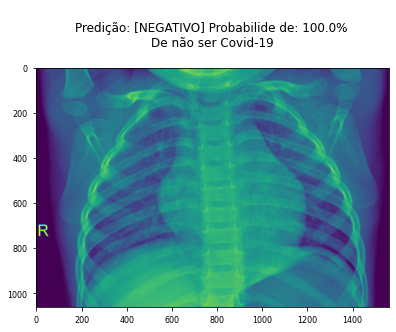

In [ ]:
imagePath = '../dataset_validation/normal_validation/IM-0501-0001-0002.jpeg'
pred = test_rx_image_for_Covid19(imagePath)

### Teste Sem Covid - Mas possui Pneumonia


 Raio-X detectar covid-19 usando IA- BIA_PA
    [AVISO] - Ainda é necessária a supervisão de um especialista


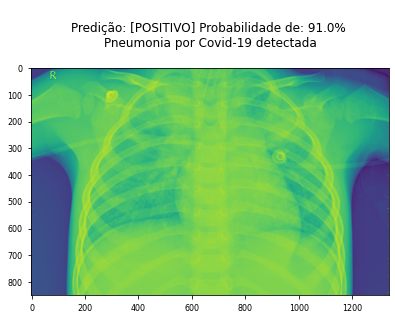

In [ ]:
imagePath = '../dataset_validation/non_covid_pneumonia_validation/person1103_bacteria_3044.jpeg'
pred = test_rx_image_for_Covid19(imagePath)


 X-Ray Covid-19 Detection using AI - MJRovai
    [WARNING] - Only for didactic purposes


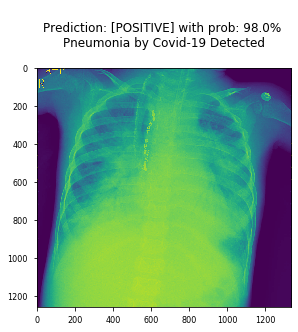

In [ ]:
imagePath = '../dataset_validation/non_covid_pneumonia_validation/person124_virus_238.jpeg'
pred = test_rx_image_for_Covid19(imagePath)


 X-Ray Covid-19 Detection using AI - MJRovai
    [WARNING] - Only for didactic purposes


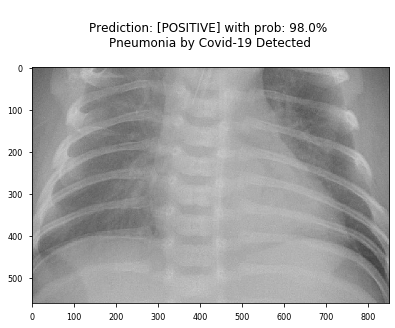

In [ ]:
imagePath = '../dataset_validation/non_covid_pneumonia_validation/person69_bacteria_338.jpeg'
pred = test_rx_image_for_Covid19(imagePath)


 X-Ray Covid-19 Detection using AI - MJRovai
    [WARNING] - Only for didactic purposes


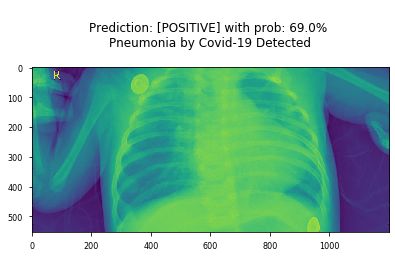

In [ ]:
imagePath = '../dataset_validation/non_covid_pneumonia_validation/person26_bacteria_122.jpeg'
pred = test_rx_image_for_Covid19(imagePath)

### Validação em lotes

In [ ]:
covid_val_images

['../dataset_validation/covid_validation/31BA3780-2323-493F-8AED-62081B9C383B.jpeg',
 '../dataset_validation/covid_validation/7C69C012-7479-493F-8722-ABC29C60A2DD.jpeg',
 '../dataset_validation/covid_validation/E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg',
 '../dataset_validation/covid_validation/6C94A287-C059-46A0-8600-AFB95F4727B7.jpeg',
 '../dataset_validation/covid_validation/2966893D-5DDF-4B68-9E2B-4979D5956C8E.jpeg',
 '../dataset_validation/covid_validation/F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg',
 '../dataset_validation/covid_validation/B2D20576-00B7-4519-A415-72DE29C90C34.jpeg',
 '../dataset_validation/covid_validation/F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg']

In [ ]:
img_lst = covid_val_images
covid_predictions_score, covid_neg_cnt, covid_pos_cnt = test_rx_image_for_Covid19_batch(img_lst)
covid_predictions_score

8 positive detected in a total of 8 images


[0.99642843,
 0.80860543,
 0.9762832,
 0.9975574,
 0.997468,
 0.9731784,
 0.99297273,
 0.97964394]

In [ ]:
dist = covid_predictions_score
plot_prediction_distribution(dist, "Distribuição da pontuação de previsão do conjunto de dados de validação da Covid")

In [ ]:
print ('Média da pontuação da previsão do conjunto de dados de validação da Covid: ',stat.mean(dist))
print ('Média da pontuação de previsão do conjunto de dados de validação da Covid: ',stat.median(dist))

Covid Validation Dataset Prediction Score Mean:  0.9652672
Covid Validation Dataset Prediction Score Median:  0.9863083362579346


In [ ]:
img_lst = normal_val_images
normal_predictions_score, normal_neg_cnt, normal_pos_cnt = test_rx_image_for_Covid19_batch(
    img_lst)
normal_predictions_score

0 positive detected in a total of 20 images


[0.25851375,
 0.025379542,
 0.005824779,
 0.0047603976,
 0.042225637,
 0.025087152,
 0.035508618,
 0.009078974,
 0.014746706,
 0.06489486,
 0.003134642,
 0.004970203,
 0.15801577,
 0.006775451,
 0.0032735346,
 0.007105667,
 0.001369465,
 0.005155371,
 0.029973848,
 0.014993184]

In [ ]:
dist = normal_predictions_score
plot_prediction_distribution(dist, "Validação da Distribuição do cojunto de dados Normal")

### Testando com "conjunto de dados de teste do peito"

In [ ]:
validation_path = '../input/20_Chest_Xray/test'

normal_test_val_images = list(paths.list_images(f"{validation_path}/NORMAL"))
print("Imagens normais de raio-X: ", len(normal_test_val_images))

pneumo_test_val_images = list(paths.list_images(f"{validation_path}/PNEUMONIA"))
print("Imagens de raio-X Pneumonia: ", len(pneumo_test_val_images))

Normal Xray Images:  234
Pneumo Xray Images:  390


**Normal**

In [ ]:
normal_test_predictions_score, normal_test_neg_cnt, normal_test_pos_cnt = test_rx_image_for_Covid19_batch(
    normal_test_val_images)

24 positive detected in a total of 234 images


In [ ]:
stat.mean(normal_test_predictions_score)

0.15336609

In [ ]:
stat.median(normal_test_predictions_score)

0.04279410094022751

In [ ]:
dist = normal_test_predictions_score
plot_prediction_distribution(dist, "Distribuição normal da pontuação do conjunto de dados de teste")

**Pneumo**

In [ ]:
pneumo_test_predictions_score, pneumo_test_neg_cnt, pneumo_test_pos_cnt = test_rx_image_for_Covid19_batch(
    pneumo_test_val_images)

185 positive detected in a total of 390 images


In [ ]:
stat.mean(pneumo_test_predictions_score)

0.46589988

In [ ]:
stat.median(pneumo_test_predictions_score)

0.42066246271133423

In [ ]:
dist = pneumo_test_predictions_score
plot_prediction_distribution(pneumo_test_predictions_score, "Distribuição da pontuação da previsão do conjunto de dados do teste Pneumo")